In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('ETP_Dataset.csv')

In [3]:
data.head()

,Date/heure,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],min_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%],Somme_Precipitation[mm],moy_WindSpeed[m/s],max_WindSpeed[m/s],max_WindSpeedMax[m/s],moy_WindDirection[deg],dernier_WindDirection[deg],ETP quotidien [mm]
0,05/08/2022 00:00,24.73,35.08,15.11,12.4,8.8,361,1.90,0.30,51.87,83.30,22.00,0.0,0.5,2.1,4.4,263.5,263.5,2.8
1,04/08/2022 00:00,25.26,35.79,16.40,14.6,8.0,288,1.73,0.00,59.06,99.54,19.84,0.0,0.6,1.7,5.3,263.5,263.5,5.0
2,03/08/2022 00:00,28.37,36.71,19.80,12.3,7.4,285,2.56,0.95,38.43,65.76,23.60,0.0,0.7,2.6,5.3,263.5,263.5,5.3
3,02/08/2022 00:00,32.17,43.43,19.68,0.9,-4.7,296,4.55,1.70,16.44,38.56,5.23,0.0,0.6,2.3,6.6,263.5,263.5,5.3
4,01/08/2022 00:00,32.30,41.90,21.26,8.7,1.5,290,3.97,1.39,26.68,47.56,9.52,0.0,0.6,2.7,6.7,263.5,263.5,5.5


In [4]:
list(data.columns)

['Date/heure',
 'moy_Temp[°C]',
 'max_Temp[°C]',
 'min_Temp[°C]',
 'moy_DewPoint[°C]',
 'min_DewPoint[°C]',
 'moy_SolarRadiation[W/m2]',
 'moy_VPD[kPa]',
 'min_VPD[kPa]',
 'moy_RelativeHumidity[%]',
 'max_RelativeHumidity[%]',
 'min_RelativeHumidity[%]',
 'Somme_Precipitation[mm]',
 'moy_WindSpeed[m/s]',
 'max_WindSpeed[m/s]',
 'max_WindSpeedMax[m/s]',
 'moy_WindDirection[deg]',
 'dernier_WindDirection[deg]',
 'ETP quotidien [mm]']

**Dropping columns = [Date/heure , moy_WindDirection[deg] , dernier_WindDirection[deg]]**

In [5]:
data.drop('Date/heure', inplace=True, axis=1)
data.drop('moy_WindDirection[deg]', inplace=True, axis=1)
data.drop('dernier_WindDirection[deg]', inplace=True, axis=1)

In [6]:
data.head()

,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],min_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%],Somme_Precipitation[mm],moy_WindSpeed[m/s],max_WindSpeed[m/s],max_WindSpeedMax[m/s],ETP quotidien [mm]
0,24.73,35.08,15.11,12.4,8.8,361,1.90,0.30,51.87,83.30,22.00,0.0,0.5,2.1,4.4,2.8
1,25.26,35.79,16.40,14.6,8.0,288,1.73,0.00,59.06,99.54,19.84,0.0,0.6,1.7,5.3,5.0
2,28.37,36.71,19.80,12.3,7.4,285,2.56,0.95,38.43,65.76,23.60,0.0,0.7,2.6,5.3,5.3
3,32.17,43.43,19.68,0.9,-4.7,296,4.55,1.70,16.44,38.56,5.23,0.0,0.6,2.3,6.6,5.3
4,32.30,41.90,21.26,8.7,1.5,290,3.97,1.39,26.68,47.56,9.52,0.0,0.6,2.7,6.7,5.5


In [7]:
data.fillna(data.median(numeric_only=True).round(1), inplace=True)

In [8]:
data.isna().sum()

moy_Temp[°C]                0
max_Temp[°C]                0
min_Temp[°C]                0
moy_DewPoint[°C]            0
min_DewPoint[°C]            0
moy_SolarRadiation[W/m2]    0
moy_VPD[kPa]                0
min_VPD[kPa]                0
moy_RelativeHumidity[%]     0
max_RelativeHumidity[%]     0
min_RelativeHumidity[%]     0
Somme_Precipitation[mm]     0
moy_WindSpeed[m/s]          0
max_WindSpeed[m/s]          0
max_WindSpeedMax[m/s]       0
ETP quotidien [mm]          0
dtype: int64

In [9]:
data.dtypes

moy_Temp[°C]                float64
max_Temp[°C]                float64
min_Temp[°C]                float64
moy_DewPoint[°C]            float64
min_DewPoint[°C]            float64
moy_SolarRadiation[W/m2]      int64
moy_VPD[kPa]                float64
min_VPD[kPa]                float64
moy_RelativeHumidity[%]     float64
max_RelativeHumidity[%]     float64
min_RelativeHumidity[%]     float64
Somme_Precipitation[mm]     float64
moy_WindSpeed[m/s]          float64
max_WindSpeed[m/s]          float64
max_WindSpeedMax[m/s]       float64
ETP quotidien [mm]          float64
dtype: object

In [10]:
Lables = data["ETP quotidien [mm]"]
data.drop("ETP quotidien [mm]", inplace=True, axis=1)

**Splitting training testing data**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(data, Lables, test_size=0.2, random_state=42)

In [12]:
list(X_test.columns)

['moy_Temp[°C]',
 'max_Temp[°C]',
 'min_Temp[°C]',
 'moy_DewPoint[°C]',
 'min_DewPoint[°C]',
 'moy_SolarRadiation[W/m2]',
 'moy_VPD[kPa]',
 'min_VPD[kPa]',
 'moy_RelativeHumidity[%]',
 'max_RelativeHumidity[%]',
 'min_RelativeHumidity[%]',
 'Somme_Precipitation[mm]',
 'moy_WindSpeed[m/s]',
 'max_WindSpeed[m/s]',
 'max_WindSpeedMax[m/s]']

In [13]:
print("Size of Training data = " , len(X_train))
print("Size of Training label = " , len(Y_train))
print("Size of Testing data = " , len(X_test))
print("Size of Testing label = " , len(Y_test))

Size of Training data =  1424
Size of Training label =  1424
Size of Testing data =  357
Size of Testing label =  357


**Encoding the labels for training and testing**

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
Y_Train_transformed = label_encoder.fit_transform(Y_train)

In [16]:
Y_Test_transformed = label_encoder.fit_transform(Y_test)

**Random Forest**

In [17]:
# Create Random forest classifer object
Random_forest = RandomForestClassifier(n_estimators=100)

# Train Random forest Classifer
Random_forest.fit(X_train,Y_Train_transformed)

#Predict the response for test dataset
Random_forest_preds = Random_forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?
Random_forest_accuracy = metrics.accuracy_score(Y_Test_transformed, Random_forest_preds)
print("Accuracy for random forest :",Random_forest_accuracy)
Random_forest_F1_score_macro = f1_score(Y_Test_transformed, Random_forest_preds, average='macro')
print("F1 score with macro avg for Random_forest classifier :" , Random_forest_F1_score_macro)
Random_forest_F1_score_micro = f1_score(Y_Test_transformed, Random_forest_preds, average='micro')
print("F1 score with micro avg for Random_forest classifier :" , Random_forest_F1_score_micro)

Accuracy for random forest : 0.11484593837535013
F1 score with macro avg for Random_forest classifier : 0.0888099613999901
F1 score with micro avg for Random_forest classifier : 0.11484593837535013


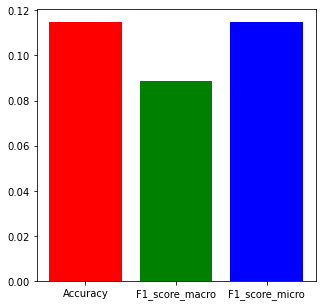

In [18]:
#Plotting Random_forest acurracy metrics
Y_axis = [Random_forest_accuracy , Random_forest_F1_score_macro , Random_forest_F1_score_micro]
X_axis = ["Accuracy" , "F1_score_macro", "F1_score_micro"]

fig = plt.figure(figsize =(5, 5))

# Horizontal Bar Plot
plt.bar(X_axis, Y_axis,color = ['red', 'green','blue'])
 
# Show Plot
plt.show()

In [19]:
# cm = confusion_matrix(Y_Test_transformed,Random_forest_preds)
# fig , ax= plt.subplots(figsize=(10, 10))
# sns.heatmap(cm, cmap=plt.cm.Blues,annot = True,ax=ax)
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# ax.set_title('Random forest Confusion Matrix')
# plt.show()

In [20]:
# print(classification_report(Y_Test_transformed,Random_forest_preds))

**Decision Tree**

In [21]:
# Create Decision Tree classifer object
Decision_Tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
Decision_Tree.fit(X_train,Y_Train_transformed)

#Predict the response for test dataset
Decision_Tree_preds = Decision_Tree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
Decision_tree_accuracy = metrics.accuracy_score(Y_Test_transformed, Decision_Tree_preds)
print("Accuracy for decisoion Tree:",Decision_tree_accuracy)
Decision_tree_F1_score_macro = f1_score(Y_Test_transformed, Decision_Tree_preds, average='macro')
print("F1 score with macro avg for Decisoion Tree classifier :" , Decision_tree_F1_score_macro)
Decision_tree_F1_score_micro = f1_score(Y_Test_transformed, Decision_Tree_preds, average='micro')
print("F1 score with micro avg for Decisoion Tree classifier :" , Decision_tree_F1_score_micro)

Accuracy for decisoion Tree: 0.11484593837535013
F1 score with macro avg for Decisoion Tree classifier : 0.10018512552073022
F1 score with micro avg for Decisoion Tree classifier : 0.11484593837535013


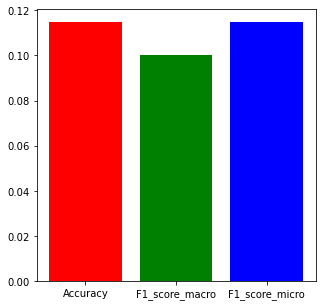

In [22]:
Y_axis = [Decision_tree_accuracy , Decision_tree_F1_score_macro , Decision_tree_F1_score_micro]
X_axis = ["Accuracy" , "F1_score_macro", "F1_score_micro"]

fig = plt.figure(figsize =(5, 5))
 
# Horizontal Bar Plot
plt.bar(X_axis, Y_axis,color = ['red', 'green','blue'])
 
# Show Plot
plt.show()

In [23]:
# cm = confusion_matrix(Y_Test_transformed,Decision_Tree_preds)
# fig , ax= plt.subplots(figsize=(10, 10))
# sns.heatmap(cm, cmap=plt.cm.Blues,annot = True,ax=ax)
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# ax.set_title('Decision Tree Confusion Matrix')
# plt.show()

In [24]:
# print(classification_report(Y_Test_transformed,Decision_Tree_preds))

**SVR**

In [25]:
# Create SVR regression object
SVR_regressor = SVR(C=1.0, epsilon=0.2)

# Train SVR regression
SVR_regressor.fit(X_train,Y_Train_transformed)

#Predict the response for test dataset
SVR_Regressor_preds = SVR_regressor.predict(X_test)

# Model Accuracy, how often is the regressor correct?
SVR_Accuracy = r2_score(Y_Test_transformed, SVR_Regressor_preds)
print("R2 score for SVR regression:",SVR_Accuracy)


R2 score for SVR regression: 0.9470843962238302


In [26]:
SVR_mean_squared_log_error = mean_squared_log_error(Y_Test_transformed, SVR_Regressor_preds)
SVR_mean_squared_log_error

0.11551152063307875

In [27]:
SVR_mean_absolute_error = mean_absolute_error(Y_Test_transformed, SVR_Regressor_preds)
SVR_mean_absolute_error

2.9976748052464304

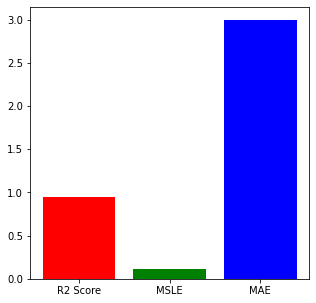

In [28]:
Y_axis = [SVR_Accuracy , SVR_mean_squared_log_error , SVR_mean_absolute_error]
X_axis = ["R2 Score" , "MSLE", "MAE"]

fig = plt.figure(figsize =(5, 5))
 
# Horizontal Bar Plot
plt.bar(X_axis, Y_axis,color = ['red', 'green','blue'])
 
# Show Plot
plt.show()

In [29]:
Accuracies = [Decision_tree_accuracy , Random_forest_accuracy , SVR_Accuracy]
Models = ["Decison_Tree" , "Random_Forest", "SVR"]

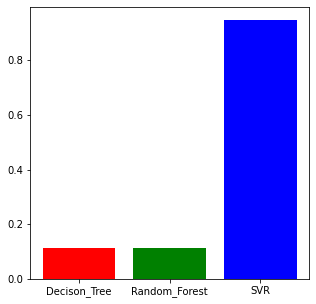

In [30]:
fig = plt.figure(figsize =(5, 5))
 
# Horizontal Bar Plot
plt.bar(Models, Accuracies,color = ['red', 'green','blue'])
 
# Show Plot
plt.show()